In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
from pandas.plotting import table

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#last data point is 2017-08-23

# Calculate the date 1 year ago from the last data point in the database
last_year=(dt.date(2017,8,23)-dt.timedelta(days=365))
# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date, measurement.prcp).filter(measurement.date>=last_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
hawaii_df=pd.DataFrame(results, columns=["date", "precipitation"])
hawaii_df.set_index(hawaii_df['date'], inplace=True)

# Sort the dataframe by date
##it appears to already be sorted that way? Why re-sort it? 
hawaii_df



,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


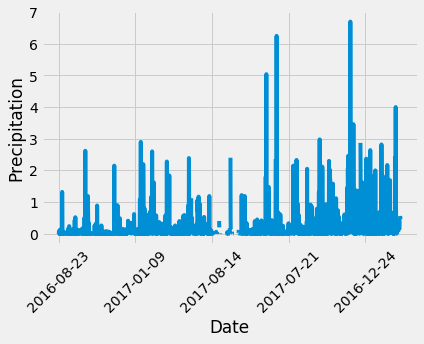

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
hawaii_df.plot(rot=45, legend=None)
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
avg_prcp=hawaii_df["precipitation"].mean()
med_prcp=hawaii_df["precipitation"].median()
mode_prcp=hawaii_df["precipitation"].mode()
print(f"Mean: {avg_prcp}, Median: {med_prcp}, Mode: {mode_prcp}")

Mean: 0.17727857496288996, Median: 0.02, Mode: 0    0.0
dtype: float64


In [14]:
hawaii_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9)]

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
columns=inspect(engine).get_columns('measurement')
for i in columns:
    print(i['name'],i['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
#'tobs' means "Temperature Observations"
min=session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
max=session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
avg=session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
print(f"Min:{min}, Max:{max}, Avg:{avg}")

Min:[(54.0,)], Max:[(85.0,)], Avg:[(71.66378066378067,)]


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
waihee=session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>=last_year)
waihee_df=pd.DataFrame(waihee, columns=["tobs"])

Text(0.5, 0, 'Temperature')

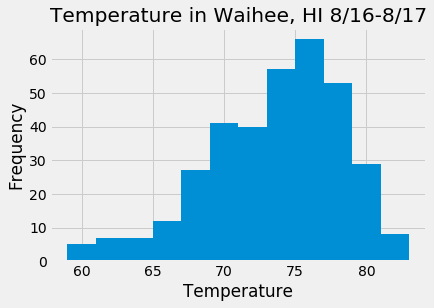

In [28]:
#and plot the results as a histogram
waihee_df.plot.hist(bins=12, legend=False)
plt.title("Temperature in Waihee, HI 8/16-8/17")
plt.xlabel("Temperature")